In [1]:
import IPython
%pylab inline

Populating the interactive namespace from numpy and matplotlib


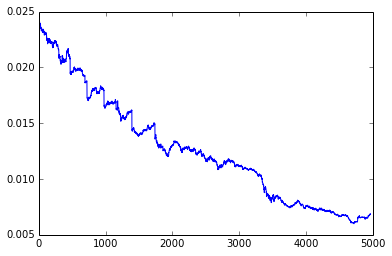

In [2]:
# Load dataset
with open('PakistanSDR.tsv','r') as tsv:
    data = [line.strip().split('\t') for line in tsv]

#Extract relevant data
dates = [d[0] for d in data[3:-13]]
sdr = [float(d[1].split(' ')[0]) for d in data[3:-13]]
sdr = np.array(sdr)

plot(sdr)

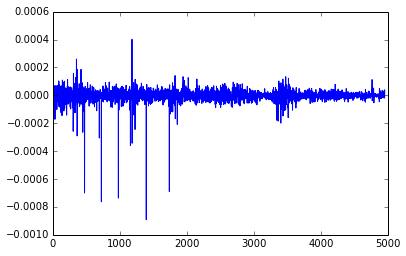

In [3]:
# Make complimentary dataset
dsdr = np.gradient(sdr)	#First derivative
plot(dsdr)

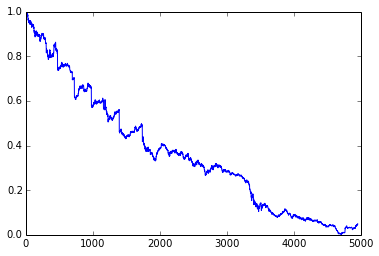

In [4]:
#Process dataset 1
max_data = np.max(sdr)
min_data = np.min(sdr)

#Convert to 0-1 range
data_1 = [1.0*(d-min_data)/(max_data-min_data) for d in sdr]

plot(data_1)

np.savetxt('scaled01.txt', data_1, newline=';\n')

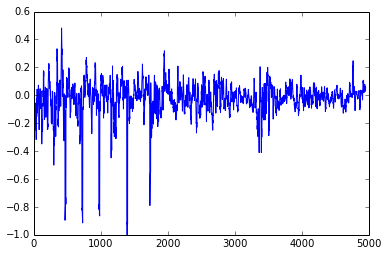

In [5]:
#Process gradient of dataset
l = 14
kernel = np.ones(l)/l
# kernel[0] = 1

dsdr_filt = np.convolve(dsdr, kernel, mode='same')
dsdr = dsdr_filt / np.max(np.abs(dsdr_filt))

plot(dsdr)

np.savetxt('dsdr_filt.txt', dsdr, newline=';\n')

Now open the PD file `PMS.pd` to see the interface that uses these two data files. 